In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [33]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    useless_columns = ["muonenergy", "muonx", "muony", "muonz", "muonpx", "muonpy", "muonpz"]
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(os.path.join(dirin, files[0]), comment='#', index_col=False)
    df = df[df.columns[:-1]]
    df = df[set(df.columns).difference(useless_columns)]
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(os.path.join(dirin, file), comment='#', index_col=False)
        # keep only meaningful fields
        dftmp = dftmp[dftmp.columns[:-1]]
        dftmp = dftmp[set(df.columns).difference(useless_columns)]
        df = pd.concat([df, dftmp])
    return df


In [34]:
dirin = os.path.join("..", "..", "Data", "MuonsROI")
filepref = "roi_RndSeed123456789_part1_part*"
roi = load_dataframe_from_files(dirin, filepref)

[Info] Loading ../../Data/MuonsROI/roi_RndSeed123456789_part1_part1.csv
[Info] Loading ../../Data/MuonsROI/roi_RndSeed123456789_part1_part2.csv
[Info] Loading ../../Data/MuonsROI/roi_RndSeed123456789_part1_part3.csv
[Info] Loading ../../Data/MuonsROI/roi_RndSeed123456789_part1_part4.csv
[Info] Loading ../../Data/MuonsROI/roi_RndSeed123456789_part1_part5.csv
[Info] Loading ../../Data/MuonsROI/roi_RndSeed123456789_part1_part6.csv
[Info] Loading ../../Data/MuonsROI/roi_RndSeed123456789_part1_part7.csv


In [36]:
print("Entries: {}".format(len(roi)))
print("Events: {}".format(roi.eventnumber.nunique()))
roi = roi.sort_values(["eventnumber", "tracknumber", "time"])
roi.head()

Entries: 15608416
Events: 20751


,parentnucleusPID,ParentTrackID,energydeposition,kineticenergy,creatorprocess,time,eventnumber,y,px,tracknumber,z,detectionefficiency,pz,py,x,PID
0,0,0,35488.673379,1.599984e+07,None,37.811098,5,-497.878904,0.443481,1,779.462441,0.000656,-0.793294,0.417143,-76.662224,13
1,0,0,8334.193088,1.599112e+07,None,37.945860,5,-481.068470,0.443809,1,747.399497,0.000328,-0.793586,0.416239,-58.731288,13
2,0,0,129.223275,1.599053e+07,None,37.948375,5,-480.754588,0.443791,1,746.801060,0.000328,-0.793610,0.416213,-58.396614,13
3,0,0,18822.988750,1.597142e+07,None,38.293771,5,-437.657976,0.444276,1,664.626949,0.000656,-0.792988,0.416879,-12.444372,13
4,0,0,5000.453740,1.596597e+07,None,38.379425,5,-426.953327,0.444474,1,644.264532,0.000656,-0.792658,0.417296,-1.036219,13


In [46]:
len(roi[(roi.creatorprocess=='nCapture')].eventnumber.unique())

135

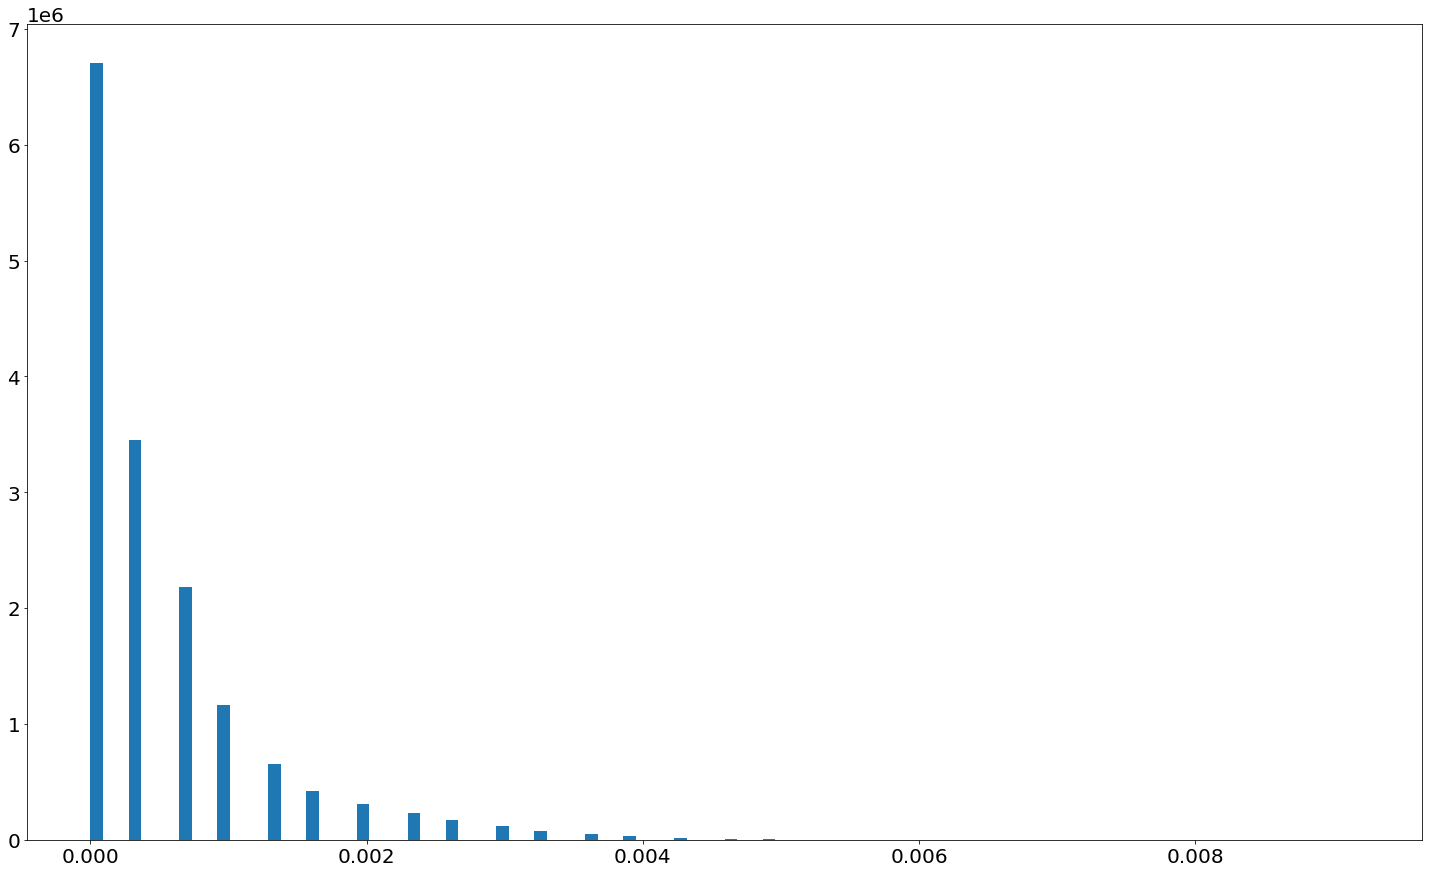

count    1.560842e+07
mean     5.075384e-04
std      7.167851e-04
min      0.000000e+00
25%      0.000000e+00
50%      3.280000e-04
75%      6.560000e-04
max      9.184000e-03
Name: detectionefficiency, dtype: float64

In [53]:
plt.hist(roi.detectionefficiency, bins=100)
plt.show()
roi.detectionefficiency.describe()